**Import Modules**

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import nltk
import tweepy
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import os
os.chdir('F:/Use Cases ML/SMA')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Importing twitter API credentials**

In [2]:
%run ./keys_tweeter.ipynb
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
search_terms = 'spinal muscular atrophy '
#search_words = ["spinal muscular atrophy", "SMA", "#spinal muscular atrophy"]
lang = 'english'
date_since = "2021-05-01"
#date_until = "2021-05-12"
tweets = []
likes = []
time = []
#cursor = tweepy.Cursor(api.search,q=search_terms,tweet_mode = "extended",since='2021-01-01', until='2021-05-10').items()
for i in tweepy.Cursor(api.search,q=search_terms,lang="en",tweet_mode = "extended",\
                       since_id=date_since,count=5000).items():
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [4]:
df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})

In [42]:
#read dataset
#df = pd.read_csv('Tweets.csv')

In [43]:
df = df.drop_duplicates(keep=False)
df.head()

,Unnamed: 0,Unnamed: 0.1,tweets,likes,time
0,0,0,"Spinraza, a drug for spinal muscular atrophy, ...",0,2021-05-23 08:32:01
1,1,1,@SonuSood This child from Bikaner(Rajasthan) n...,0,2021-05-23 08:19:31
2,2,2,This child from Bikaner(Rajasthan) need your h...,0,2021-05-23 03:38:59
3,3,3,Alabama lawmakers: Get Spinal Muscular Atrophy...,0,2021-05-23 03:11:10
4,4,4,Children with spinal muscular atrophy may expe...,12,2021-05-23 02:09:01


**Preprocessing the dataset**

In [44]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [45]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweets'], "@[\w]*")

In [46]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tweets,likes,time,clean_tweet
0,0,0,"Spinraza, a drug for spinal muscular atrophy, ...",0,2021-05-23 08:32:01,"Spinraza, a drug for spinal muscular atrophy, ..."
1,1,1,@SonuSood This child from Bikaner(Rajasthan) n...,0,2021-05-23 08:19:31,This child from Bikaner(Rajasthan) need your ...
2,2,2,This child from Bikaner(Rajasthan) need your h...,0,2021-05-23 03:38:59,This child from Bikaner(Rajasthan) need your h...
3,3,3,Alabama lawmakers: Get Spinal Muscular Atrophy...,0,2021-05-23 03:11:10,Alabama lawmakers: Get Spinal Muscular Atrophy...
4,4,4,Children with spinal muscular atrophy may expe...,12,2021-05-23 02:09:01,Children with spinal muscular atrophy may expe...


In [47]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Unnamed: 0,Unnamed: 0.1,tweets,likes,time,clean_tweet
0,0,0,"Spinraza, a drug for spinal muscular atrophy, ...",0,2021-05-23 08:32:01,Spinraza a drug for spinal muscular atrophy ...
1,1,1,@SonuSood This child from Bikaner(Rajasthan) n...,0,2021-05-23 08:19:31,This child from Bikaner Rajasthan need your ...
2,2,2,This child from Bikaner(Rajasthan) need your h...,0,2021-05-23 03:38:59,This child from Bikaner Rajasthan need your h...
3,3,3,Alabama lawmakers: Get Spinal Muscular Atrophy...,0,2021-05-23 03:11:10,Alabama lawmakers Get Spinal Muscular Atrophy...
4,4,4,Children with spinal muscular atrophy may expe...,12,2021-05-23 02:09:01,Children with spinal muscular atrophy may expe...


In [48]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Unnamed: 0,Unnamed: 0.1,tweets,likes,time,clean_tweet
0,0,0,"Spinraza, a drug for spinal muscular atrophy, ...",0,2021-05-23 08:32:01,Spinraza drug spinal muscular atrophy money sa...
1,1,1,@SonuSood This child from Bikaner(Rajasthan) n...,0,2021-05-23 08:19:31,This child from Bikaner Rajasthan need your he...
2,2,2,This child from Bikaner(Rajasthan) need your h...,0,2021-05-23 03:38:59,This child from Bikaner Rajasthan need your he...
3,3,3,Alabama lawmakers: Get Spinal Muscular Atrophy...,0,2021-05-23 03:11:10,Alabama lawmakers Spinal Muscular Atrophy Born...
4,4,4,Children with spinal muscular atrophy may expe...,12,2021-05-23 02:09:01,Children with spinal muscular atrophy experien...


In [49]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Spinraza, drug, spinal, muscular, atrophy, mo...
1    [This, child, from, Bikaner, Rajasthan, need, ...
2    [This, child, from, Bikaner, Rajasthan, need, ...
3    [Alabama, lawmakers, Spinal, Muscular, Atrophy...
4    [Children, with, spinal, muscular, atrophy, ex...
Name: clean_tweet, dtype: object

In [50]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [spinraza, drug, spinal, muscular, atrophi, mo...
1    [thi, child, from, bikan, rajasthan, need, you...
2    [thi, child, from, bikan, rajasthan, need, you...
3    [alabama, lawmak, spinal, muscular, atrophi, b...
4    [children, with, spinal, muscular, atrophi, ex...
Name: clean_tweet, dtype: object

In [51]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,Unnamed: 0,Unnamed: 0.1,tweets,likes,time,clean_tweet
0,0,0,"Spinraza, a drug for spinal muscular atrophy, ...",0,2021-05-23 08:32:01,spinraza drug spinal muscular atrophi money sa...
1,1,1,@SonuSood This child from Bikaner(Rajasthan) n...,0,2021-05-23 08:19:31,thi child from bikan rajasthan need your help ...
2,2,2,This child from Bikaner(Rajasthan) need your h...,0,2021-05-23 03:38:59,thi child from bikan rajasthan need your help ...
3,3,3,Alabama lawmakers: Get Spinal Muscular Atrophy...,0,2021-05-23 03:11:10,alabama lawmak spinal muscular atrophi born sc...
4,4,4,Children with spinal muscular atrophy may expe...,12,2021-05-23 02:09:01,children with spinal muscular atrophi experi l...


**Exploratory Data Analysis**

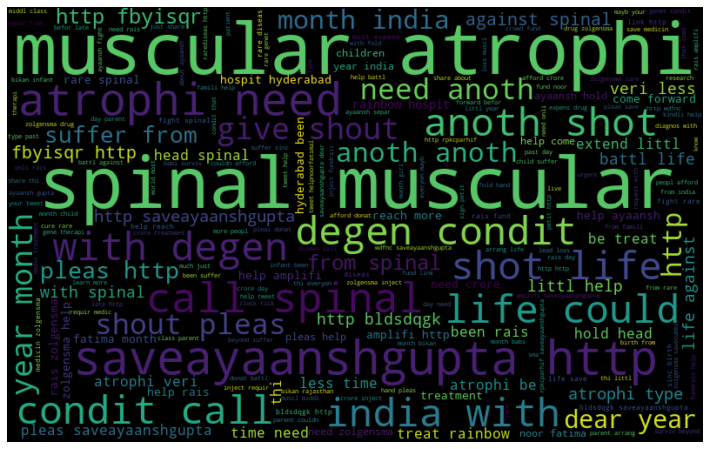

In [52]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from sklearn.feature_extraction import text
add_stop_words = ['https', 'get', 'many', 'have', 'hold', 'sir','need','help','plz','make','available','pls','from']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42,max_font_size=100,stopwords=stop_words).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
import nltk
#vador lexicon approach
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [55]:
df['clean_tweet_score'] = df['clean_tweet'].apply(lambda review: sia.polarity_scores(review))

In [56]:
df['sentiment_clean_tweet_score'] = df['clean_tweet_score'].apply(lambda x:x['compound'])

In [57]:
df['compound_score'] = df['sentiment_clean_tweet_score'].apply(lambda score: 'pos' if score > 0 else 'neg')

In [58]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tweets,likes,time,clean_tweet,clean_tweet_score,sentiment_clean_tweet_score,compound_score
0,0,0,"Spinraza, a drug for spinal muscular atrophy, ...",0,2021-05-23 08:32:01,spinraza drug spinal muscular atrophi money sa...,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.4939,pos
1,1,1,@SonuSood This child from Bikaner(Rajasthan) n...,0,2021-05-23 08:19:31,thi child from bikan rajasthan need your help ...,"{'neg': 0.158, 'neu': 0.721, 'pos': 0.122, 'co...",-0.2023,neg
2,2,2,This child from Bikaner(Rajasthan) need your h...,0,2021-05-23 03:38:59,thi child from bikan rajasthan need your help ...,"{'neg': 0.165, 'neu': 0.708, 'pos': 0.127, 'co...",-0.2023,neg
3,3,3,Alabama lawmakers: Get Spinal Muscular Atrophy...,0,2021-05-23 03:11:10,alabama lawmak spinal muscular atrophi born sc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neg
4,4,4,Children with spinal muscular atrophy may expe...,12,2021-05-23 02:09:01,children with spinal muscular atrophi experi l...,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",0.4588,pos


In [59]:
#Intution about the percentage of male / female survival rate
def bar_chart(feature):
    positive = df[df['compound_score'] == 'pos'][feature].value_counts()
    negative = df[df['compound_score'] == 'neg'][feature].value_counts()
    df1 = pd.DataFrame([positive,negative])
    df1.index = ['positive','negative']
    df1.plot(kind = 'bar',stacked = True,figsize=(10,5))

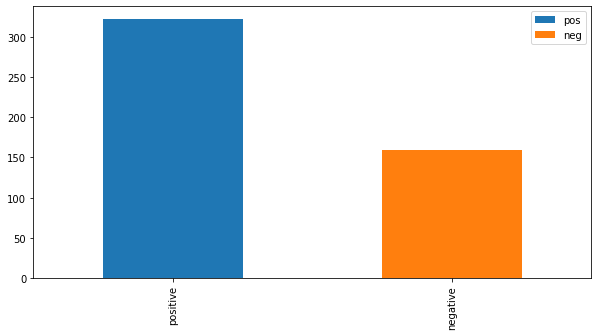

In [60]:
bar_chart('compound_score')

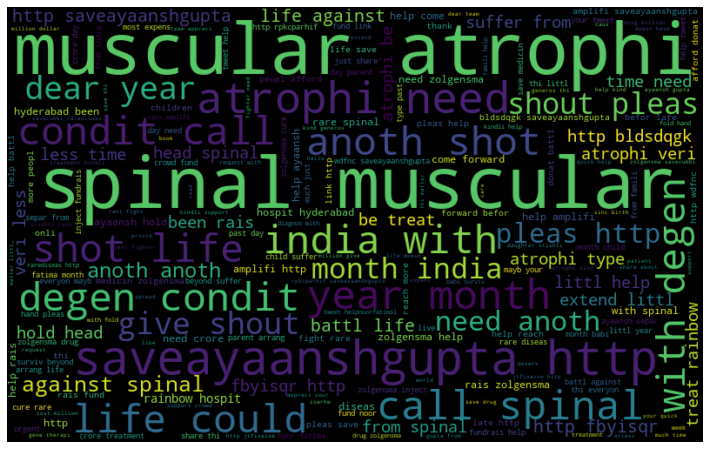

In [61]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['compound_score']=='pos']])
add_stop_words = ['https', 'get', 'many', 'have', 'hold', 'sir','need','help','plz','make','available','pls','from']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100,stopwords=stop_words).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

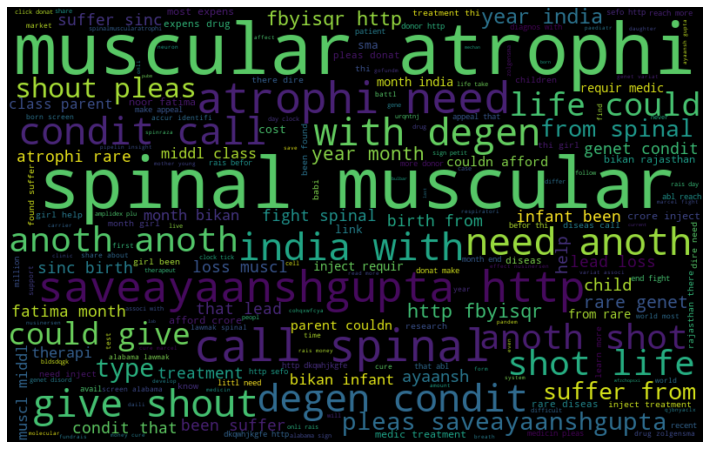

In [62]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['compound_score']=='neg']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
#extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [64]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['compound_score']=='pos'])

# # extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['compound_score']=='neg'])

In [65]:
ht_positive = [x for x in ht_positive if x != []]
ht_positive = [k for k in ht_negative if k != []]

In [66]:
ht_positive

[['ayaansh', 'saveayaanshgupta'],
 ['ayaansh', 'saveayaanshgupta'],
 ['ayaansh', 'saveayaanshgupta'],
 ['ayaansh', 'saveayaanshgupta'],
 ['market'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['disabl'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['pleasedon', 'pleaseshar', 'viral', 'help'],
 ['saveayaanshgupta'],
 ['save', 'noorfatima', 'bikan'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['spinalmuscularatrophi', 'stemcellcareindia', 'sma'],
 ['sma'],
 ['gofundm'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['saveayaanshgupta'],
 ['embliit', 'splice', 'sma'],
 ['mdpimetabolit', 'physiolog', 'urin', 'serum'],
 ['saveayaanshgupta'],
 ['neurolog'],
 ['saveayaanshgupta'],
 ['ayaansh', 'saveayaanshgupta'],
 ['saveayaanshgupt

In [67]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['tweets'].apply(pol)
df['subjectivity'] = df['tweets'].apply(sub)
df.head()

,Unnamed: 0,Unnamed: 0.1,tweets,likes,time,clean_tweet,clean_tweet_score,sentiment_clean_tweet_score,compound_score,polarity,subjectivity
0,0,0,"Spinraza, a drug for spinal muscular atrophy, ...",0,2021-05-23 08:32:01,spinraza drug spinal muscular atrophi money sa...,"{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...",0.4939,pos,0.000000,0.000000
1,1,1,@SonuSood This child from Bikaner(Rajasthan) n...,0,2021-05-23 08:19:31,thi child from bikan rajasthan need your help ...,"{'neg': 0.158, 'neu': 0.721, 'pos': 0.122, 'co...",-0.2023,neg,0.000000,0.000000
2,2,2,This child from Bikaner(Rajasthan) need your h...,0,2021-05-23 03:38:59,thi child from bikan rajasthan need your help ...,"{'neg': 0.165, 'neu': 0.708, 'pos': 0.127, 'co...",-0.2023,neg,0.000000,0.000000
3,3,3,Alabama lawmakers: Get Spinal Muscular Atrophy...,0,2021-05-23 03:11:10,alabama lawmak spinal muscular atrophi born sc...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neg,0.170455,0.454545
4,4,4,Children with spinal muscular atrophy may expe...,12,2021-05-23 02:09:01,children with spinal muscular atrophi experi l...,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",0.4588,pos,0.136364,0.454545


**Model building**

In [68]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [69]:
label_map = {'pos':0,'neg':1,}
df['label'] = df['compound_score'].map(label_map)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

**Model Training**

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [72]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [73]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.8735632183908046

In [74]:
accuracy_score(y_test,pred)

0.9090909090909091

In [75]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.8631578947368421

In [76]:
accuracy_score(y_test,pred)

0.8925619834710744